# JPY/INR

In [49]:
import numpy as np
import pandas as pd


In [50]:
df = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [51]:
jpy_inr = df.loc[df['Currency Pair']=='JPY/INR']
jpy_inr.reset_index(drop=True,inplace=True)


In [55]:
import swing_technical_indicators 

In [56]:
print(dir(swing_technical_indicators))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_100ema', 'calculate_200ema', 'calculate_50ema', 'calculate_bollinger_bands', 'calculate_macd', 'calculate_rsi', 'calculate_swing_support_resistance', 'indicators']


1. ADFuller Test 

In [57]:
jpy_inr['Date']= pd.to_datetime(jpy_inr['Date'])

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\2019296255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for i in jpy_inr.columns : 
  if i!='Currency Pair' :
    print("ADFuller test for column : ",i)
    check_stationarity(jpy_inr[i])

ADFuller test for column :  Date
ADF Statistic: 0.872360
p-value: 0.992719
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Open_price
ADF Statistic: -1.854371
p-value: 0.353821
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_high
ADF Statistic: -1.939119
p-value: 0.313888
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_low
ADF Statistic: -1.828493
p-value: 0.366410
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test fo

# Decomposition

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

def deseasonalize_column(data, column, period=7):
    """
    Deseasonalizes a column by decomposing it into trend, seasonality, and residual components.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the time series data.
    - column (str): The name of the column to deseasonalize.
    - period (int): The periodicity of the data (e.g., 7 for weekly seasonality).
    
    Returns:
    - pd.Series: The deseasonalized version of the column.
    """
    # Decompose the column
    decomposition = seasonal_decompose(data[column], model='additive', period=period, extrapolate_trend='freq')
    
    # Extract the residual component as deseasonalized data
    deseasonalized = data[column] - decomposition.seasonal
    
    return deseasonalized

# Identify non-stationary columns
non_stationary_columns = ['Day_high', 'Day_low', 'Open_price']

# Create deseasonalized columns
for col in non_stationary_columns:
    deseasonalized_col = deseasonalize_column(jpy_inr, col, period=14)  # Adjust the period as needed
    jpy_inr[f'Deseasonalized_{col}'] = deseasonalized_col


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\1611286044.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\1611286044.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\1611286044.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [60]:
jpy_inr 

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Date_numeric,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,1.415318e+09,0.539529,0.534135,0.536495
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,1.415578e+09,0.539838,0.535160,0.536451
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,1.415664e+09,0.534150,0.530351,0.531638
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,1.415750e+09,0.534113,0.530330,0.530508
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,1.415837e+09,0.532193,0.530159,0.530601
...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,1.729728e+09,0.553880,0.549600,0.549604
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,1.729814e+09,0.554845,0.551944,0.553659
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,1.730074e+09,0.550958,0.546250,0.548706
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,1.730160e+09,0.550409,0.546071,0.548954


## EMA 100 Feature 

In [61]:
jpy_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 100)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\1505622001.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Date_numeric,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,1.415318e+09,0.539529,0.534135,0.536495,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,1.415578e+09,0.539838,0.535160,0.536451,0.535871
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,1.415664e+09,0.534150,0.530351,0.531638,0.535772
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,1.415750e+09,0.534113,0.530330,0.530508,0.535674
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,1.415837e+09,0.532193,0.530159,0.530601,0.535589
...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,1.729728e+09,0.553880,0.549600,0.549604,0.562361
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,1.729814e+09,0.554845,0.551944,0.553659,0.562155
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,1.730074e+09,0.550958,0.546250,0.548706,0.561878
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,1.730160e+09,0.550409,0.546071,0.548954,0.561598


## EMA 200 

In [62]:
jpy_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(jpy_inr, 'Closing_price', 200)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\1960885368.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Date_numeric,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,1.415318e+09,0.539529,0.534135,0.536495,0.535870,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,1.415578e+09,0.539838,0.535160,0.536451,0.535871,0.535871
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,1.415664e+09,0.534150,0.530351,0.531638,0.535772,0.535821
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,1.415750e+09,0.534113,0.530330,0.530508,0.535674,0.535771
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,1.415837e+09,0.532193,0.530159,0.530601,0.535589,0.535727
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,1.729728e+09,0.553880,0.549600,0.549604,0.562361,0.559374
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,1.729814e+09,0.554845,0.551944,0.553659,0.562155,0.559301
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,1.730074e+09,0.550958,0.546250,0.548706,0.561878,0.559190
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,1.730160e+09,0.550409,0.546071,0.548954,0.561598,0.559076


## EMA 50 

In [63]:
jpy_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 50)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\4069695575.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Date_numeric,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,1.415318e+09,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,1.415578e+09,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,1.415664e+09,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,1.415750e+09,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,1.415837e+09,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,1.729728e+09,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,1.729814e+09,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,1.730074e+09,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,1.730160e+09,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329


## RSI Feature 

In [64]:
jpy_inr['RSI'] = swing_technical_indicators.calculate_rsi(jpy_inr,'Closing_price',21)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\1394544658.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Date_numeric,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,1.415318e+09,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,1.415578e+09,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,1.415664e+09,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,1.415750e+09,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,1.415837e+09,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,1.729728e+09,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,1.729814e+09,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,1.730074e+09,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,1.730160e+09,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871


In [65]:
import plotly.express as px 
px.line(jpy_inr['RSI'])

## MACD

In [66]:
jpy_inr_macd = swing_technical_indicators.calculate_macd(jpy_inr, column_name='Closing_price', short_period=12, long_period=26, signal_period=9)

for i in jpy_inr_macd.columns:

    jpy_inr[f"{i}"] = jpy_inr_macd[f'{i}']

jpy_inr


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Date_numeric,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,1.415318e+09,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000,0.000000,0.000000e+00,0.000000
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,1.415578e+09,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000,0.000005,9.572650e-07,0.000004
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,1.415664e+09,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000,-0.000396,-7.842673e-05,-0.000318
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,1.415750e+09,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000,-0.000708,-2.043055e-04,-0.000504
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,1.415837e+09,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000,-0.000901,-3.436465e-04,-0.000557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,1.729728e+09,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372,-0.006265,-5.093533e-03,-0.001171
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,1.729814e+09,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909,-0.006417,-5.358170e-03,-0.001059
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,1.730074e+09,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433,-0.006766,-5.639814e-03,-0.001127
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,1.730160e+09,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871,-0.006999,-5.911680e-03,-0.001087


## Bollinger Bands 

In [67]:
bollinger_data = swing_technical_indicators.calculate_bollinger_bands(jpy_inr['Closing_price'])

jpy_inr = jpy_inr.join(bollinger_data)
jpy_inr.drop('Price',axis=1, inplace=True)

c:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:202: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:203: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [68]:

X1 = jpy_inr.drop(['Date','Open_price','Day_high','Day_low','Closing_price','Currency Pair'],axis=1)
y =jpy_inr['Closing_price']

## Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X= pd.DataFrame(X,columns = X1.columns)

## Supervised ML Models 

In [ ]:
#Step 2: Define the model functions
# Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
def random_forest_model(X,y):
    rf = RandomForestRegressor()
    rf_metrics = {}

        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
        # Fit the model
    rf.fit(X_train, y_train)
        
        # Predict and calculate MAE
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"Mean Squared Error (MSE): {mse * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    rf_metrics = {'MAE': mae, 'MSE':mse*100 ,'MAPE': mape * 100, 'R^2': r2}

    print("\nRandom Forest Metrics :", rf_metrics)
        
        
       



random_forest_model(X,y)



Mean Absolute Error : 0.001517286683738791
Mean Absolute Percentage Error (MAPE): 0.249263863797751%
Mean Squared Error (MSE): 0.0004181680243828378%
R-squared (R^2): 0.9984909843892761 

Random Forest Metrics : {'MAE': 0.001517286683738791, 'MAPE': 0.0004181680243828378, 'MSE': 0.249263863797751, 'R^2': 0.9984909843892761}


## SVM 

In [ ]:
from sklearn.svm import SVR
# SVM Model
def svm_model(X,y):
    svm = SVR()
    svm_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        

    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Predict
    y_pred = svm.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"Mean Squared Error (MSE): {mse * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    svm_metrics = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2,'MSE':mse}
    
    print("\nSVM Metrics :", svm_metrics)


svm_model(X,y)

Mean Absolute Error : 0.04287585682445334
Mean Absolute Percentage Error (MAPE): 7.189970293377426%
Mean Squared Error (MSE): 0.2562369219689993%
R-squared (R^2) : 0.08834934724983146

SVM Metrics : {'MAE': 0.04287585682445334, 'MSE': 7.189970293377426, 'R^2': 0.08834934724983146}


## Hyperparameter tuning for SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def svm_model_with_hyperparameter_tuning(X,y):
    
    
    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}
    
    # Define the hyperparameter grid to search over
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter in the loss function
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters : {best_params}")
    
    # Get the best model
    best_svm = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_svm.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) * 100 
    mape = mean_absolute_percentage_error(y_test, y_pred)# Convert to percentage
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics for each currency pair
    svm_metrics_HYPERPARMETER= {
        'MAE': mae,
        'MSE': mse,
        'MAPE':mape,
        'R^2': r2
    }
    
    print(f"MAE : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"Mean Squared Error (MSE): {mse * 100}%")
    print(f"R^2 : {r2}")

# Return the metrics for all currency pairs
    return svm_metrics_HYPERPARMETER
  
svm_model_with_hyperparameter_tuning(X,y)

Best Hyperparameters : {'C': 0.1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
MAE : 0.04126965876464022
Mean Absolute Percentage Error (MAPE): 6.924627107182932%
Mean Squared Error (MSE): 23.600258898385817%
R^2 : 0.1740524248920572


{'MAE': 0.04126965876464022,
 'MSE': 0.23600258898385817,
 'MAPE': 0.06924627107182932,
 'R^2': 0.1740524248920572}

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def gradient_boosting_model(X,y):
    
    gb = GradientBoostingRegressor()
    gb_metrics = {}

    
    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
        
        # Train the model
    gb.fit(X_train, y_train)
    
    # Predict
    y_pred = gb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error: {mape*100}")
    print(f"Mean Squared Error (MAPE): {mse * 100}%")
    print(f"R-squared (R^2): {r2}")
    
    gb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2, "MSE":mse*100}

    print("\nGradient Boosting Metrics ", gb_metrics)


gradient_boosting_model(X,y)

Mean Absolute Error: 0.0016019634476976297
Mean Absolute Percentage Error: 0.26302926496555357
Mean Squared Error (MAPE): 0.00043097511603808496%
R-squared (R^2): 0.9985505769530314

Gradient Boosting Metrics  {'MACD_Histogram': {'MAE': 0.0016019634476976297, 'MAPE': 0.26302926496555357, 'R^2': 0.9985505769530314, 'MSE': 0.00043097511603808496}}


## KNN 

In [24]:
from sklearn.neighbors import KNeighborsRegressor


def knn_model(X,y):
    knn = KNeighborsRegressor()
    knn_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"Mean squared Error {mse*100}")
    print(f"R-squared (R^2): {r2}")
    
    knn_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2,'MSE':mse}
    
    print("\nKNN Metrics for each currency pair:", knn_metrics)
    
 
knn_model(X,y)

Mean Absolute Error : 0.0022418693982074285
Mean Absolute Percentage Error (MAPE) : 0.3691313870975411%
Mean squared Error 0.0009169555574903985
R-squared (R^2): 0.9964761755215688

KNN Metrics for each currency pair: {'MACD_Histogram': {'MAE': 0.0022418693982074285, 'MAPE': 0.3691313870975411, 'R^2': 0.9964761755215688, 'MSE': 9.169555574903985e-06}}


## XGBoost

In [25]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def xgboost_model(X,y):
    # Split the data by currency pair
    xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    xgb.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"Mean Squared Error (MSE) : {mse * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    xgb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2,'MSE':mse*100}

    print("\nXGBoost Metrics :", xgb_metrics)
    


xgboost_model(X,y)


Mean Absolute Error : 0.0015127784673322022
Mean Absolute Percentage Error (MAPE) : 0.24846055367658434%
Mean Squared Error (MSE) : 0.0004369893020753886%
R-squared (R^2) : 0.9983761322349224

XGBoost Metrics : {'MACD_Histogram': {'MAE': 0.0015127784673322022, 'MAPE': 0.24846055367658434, 'R^2': 0.9983761322349224, 'MSE': 0.0004369893020753886}}


## LightGBM

In [27]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [28]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def lightgbm_model(X,y):
    """
    Train and evaluate a LightGBM model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics.
    """
    # Initialize the LightGBM Regressor
    lgbm = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=-1)

    

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_train_pred=lgbm.predict(X_train)
    y_pred = lgbm.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse =  mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    lightgbm_metrics = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2,'MSE':mse*100}

    # Print the metrics

    print("LightGBM Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²): {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

    

# Example usage
lightgbm_model(X,y)


d:\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 13
[LightGBM] [Info] Start training from score 0.609581
LightGBM Model Metrics:
Mean Absolute Error (MAE): 0.0015153567885088904
Mean Absolute Percentage Error (MAPE): 0.2505838574174499%
R-squared (R²): 0.9986230749116242
Training Accuracy (R²): 0.9995992056539347
Testing Accuracy (R²): 0.9986230749116242


## CatBoost

In [29]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def catboost_model(X,y):
    """
    Train and evaluate a CatBoost model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics, training, and testing accuracy scores.
    """
    # Initialize the CatBoost Regressor
    catboost = CatBoostRegressor(
        l2_leaf_reg=15,
        iterations=1000, 
        learning_rate=0.1, 
        depth=10, 
        loss_function='MAE',  # Can be changed to 'RMSE', etc., as needed
        verbose=0  # Set to 0 to suppress training logs
    )

    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    catboost.fit(X_train, y_train)

    # Make predictions
    y_train_pred = catboost.predict(X_train)  # Predictions on training data
    y_test_pred = catboost.predict(X_test)   # Predictions on testing data

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    catboost_metrics = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2,'MSE':mse*100}

    # Print the metrics
    print(catboost.get_feature_importance())
    print("CatBoost Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²) on Test Data: {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
catboost_model(X,y)


[ 7.28176735 11.53148076  8.23450322 23.29992786  3.59904634 14.30128544
  4.54457185  3.27663722  6.11539425  4.12620515  4.58500878  5.17473653
  3.92943525]
CatBoost Model Metrics:
Mean Absolute Error (MAE): 0.001732418896945147
Mean Absolute Percentage Error (MAPE): 0.28506065824921795%
R-squared (R²) on Test Data: 0.997881449698973
Training Accuracy (R²): 0.9998620230888471
Testing Accuracy (R²): 0.997881449698973


## Linear Regression 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

linearreg_metrics = {'MAE': mae, 'R^2': r2,'MSE':mse*100,'MAPE':mape}

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
#print(f"Train Accuracy (R-squared): {train_accuracy}")
#print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the coefficients of the model:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Absolute Error: 0.0009880791176120531
Mean Squared Error: 2.303205774615492e-06
R-squared (Test): 0.9992083236486443
Coefficients: [ 1.51551093e-01  1.42879305e-01 -1.44875226e-01 -4.74114134e-03
  1.11754754e-03 -1.75586012e-02  4.40533562e-04 -3.36052233e+10
  2.80564779e+10  1.42412304e+10  1.94895163e+11 -1.04643162e+11
 -1.04295008e+11]
Intercept: 2519010519.751846


## MLPRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' where the last column is the target variable 'y'
# and all other columns are the features 'X'

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor (Neural Network model)

mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = mlp_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = mlp_model.score(X_train, y_train)
test_accuracy = mlp_model.score(X_test, y_test)

mlpreg_metrics = {'MAE': mae, 'R^2': r2,'MSE':mse*100,'MAPE':mape}

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the weights of the model:
print(f"Coefs: {mlp_model.coefs_}")
print(f"Intercepts: {mlp_model.intercepts_}")


Mean Absolute Error: 0.010720191427592382
Mean Squared Error: 0.00019770277304514757
R-squared (Test): 0.9320440180628655
Train Accuracy (R-squared): 0.9326962140000408
Test Accuracy (R-squared): 0.9320440180628655
Coefs: [array([[-7.47863243e-04,  3.37956910e-02,  3.25595547e-02, ...,
        -6.62296128e-03, -1.70832045e-01, -4.54709715e-03],
       [ 2.62851762e-02, -7.45903586e-03, -7.46290858e-02, ...,
        -1.15176597e-01,  4.90362335e-02, -2.73605498e-02],
       [-3.33495522e-02,  1.44818117e-05, -1.80270321e-03, ...,
         9.15709646e-02, -4.52952117e-02, -2.76751990e-02],
       ...,
       [ 4.95160525e-06, -5.90007666e-06, -9.96327085e-02, ...,
         1.31960459e-01,  1.15413021e-01,  3.78952924e-03],
       [-3.62847718e-02, -3.15399727e-03, -5.07476584e-02, ...,
        -1.57810552e-01, -1.57403583e-01, -4.10380040e-02],
       [ 3.48838013e-02,  5.64586797e-03, -3.15498949e-02, ...,
        -1.19825262e-01, -5.48434755e-02, -1.03021387e-04]]), array([[ 3.02502609

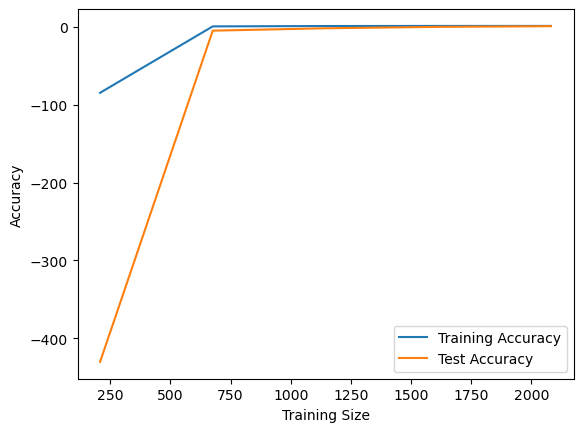

In [33]:
# Example of plotting learning curves using cross-validation
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Deep Learning Models**


## RNN

d:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0226 - mae: 0.1064 - val_loss: 0.0072 - val_mae: 0.0695
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 0.0093 - val_mae: 0.0840
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - mae: 0.0340 - val_loss: 0.0079 - val_mae: 0.0745
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 0.0107 - val_mae: 0.0887
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - mae: 0.0281 - val_loss: 0.0090 - val_mae: 0.0807
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0124 - val_mae: 0.0972
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - mae: 0.0247 - val_loss: 0.0114 - val_mae: 0.0936
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010 - mae: 0.0235 - val_loss: 0.0085 - val_mae: 0.0807
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.685

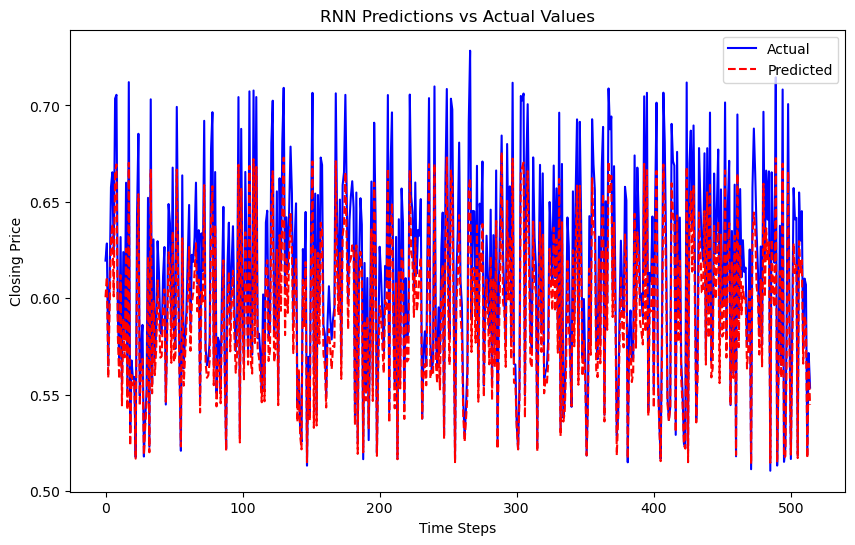

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X= X.select_dtypes('number').values
# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test_rescaled,y_pred_rescaled)

print('Mean absolute error score :',mae)
print('Mean squared error score :' ,mse)
print('R squared error :',r2)

rnn_metrics = {'MAE': mae, 'R^2': r2,'MSE':mse*100,'MAPE':mape*100}

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


In [35]:
pip install tensorflow

## LSTM

d:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0337 - mae: 0.1256 - val_loss: 0.0022 - val_mae: 0.0349
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0047 - mae: 0.0494 - val_loss: 0.0045 - val_mae: 0.0531
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0030 - mae: 0.0411 - val_loss: 0.0030 - val_mae: 0.0421
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0025 - mae: 0.0367 - val_loss: 0.0063 - val_mae: 0.0638
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0020 - mae: 0.0338 - val_loss: 0.0050 - val_mae: 0.0566
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0018 - mae: 0.0322 - val_loss: 0.0055 - val_mae: 0.0607
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0015 - mae: 0.0298 - val_loss: 0.0066 - val_mae: 0.0695
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0015 - mae: 0.0291 - val_loss: 0.0061 - val_mae: 0.0649
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.001

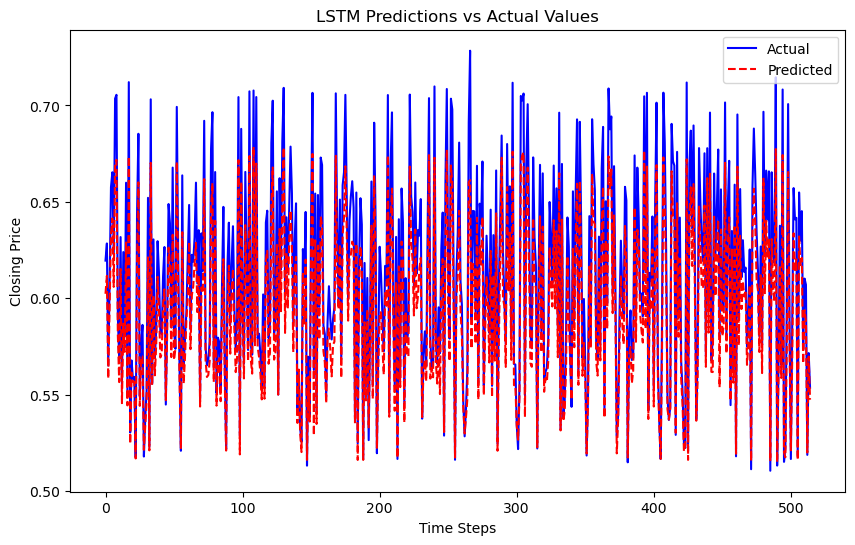

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae =  mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test_rescaled,y_pred_rescaled)


lstm_metrics = {'MAE': mae, 'R^2': r2,'MSE':mse*100,'MAPE':mape*100}
# Plot predictions vs actual values
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## GRU

Epoch 1/20


d:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1588 - mae: 0.3027 - val_loss: 0.0049 - val_mae: 0.0577
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0069 - mae: 0.0652 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0043 - mae: 0.0502 - val_loss: 0.0055 - val_mae: 0.0598
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0032 - mae: 0.0414 - val_loss: 0.0052 - val_mae: 0.0605
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0026 - mae: 0.0370 - val_loss: 0.0043 - val_mae: 0.0539
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0051 - val_mae: 0.0611
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017 - mae: 0.0316 - val_loss: 0.0059 - val_mae: 0.0662
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0016 - mae: 0.0300 - val_loss: 0.0042 - val_mae: 0.0531
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0016 - mae: 0.

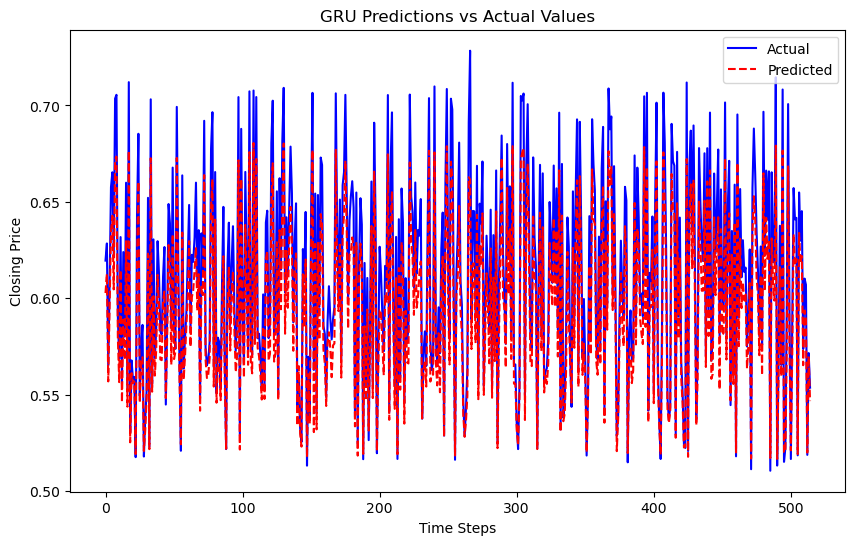

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = gru_model.evaluate(X_train, y_train)
test_loss, test_mae = gru_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae =  mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled,y_pred_rescaled)
r2 = r2_score(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled,y_pred_rescaled)

gru_metrics = {'MAE': mae * 100, 'R^2': r2,'MSE':mse*100,'MAPE':mape * 100}
# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("GRU Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## CNN

d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1982 - mae: 0.2745 - val_loss: 0.0041 - val_mae: 0.0500
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0063 - mae: 0.0619 - val_loss: 0.0026 - val_mae: 0.0386
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044 - mae: 0.0524 - val_loss: 0.0023 - val_mae: 0.0360
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - mae: 0.0485 - val_loss: 0.0020 - val_mae: 0.0338
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mae: 0.0438 - val_loss: 0.0019 - val_mae: 0.0327
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029 - mae: 0.0410 - val_loss: 0.0019 - val_mae: 0.0320
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - mae: 0.0410 - val_loss: 0.0014 - val_mae: 0.0275
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0015 - val_mae: 0.0285
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mae:

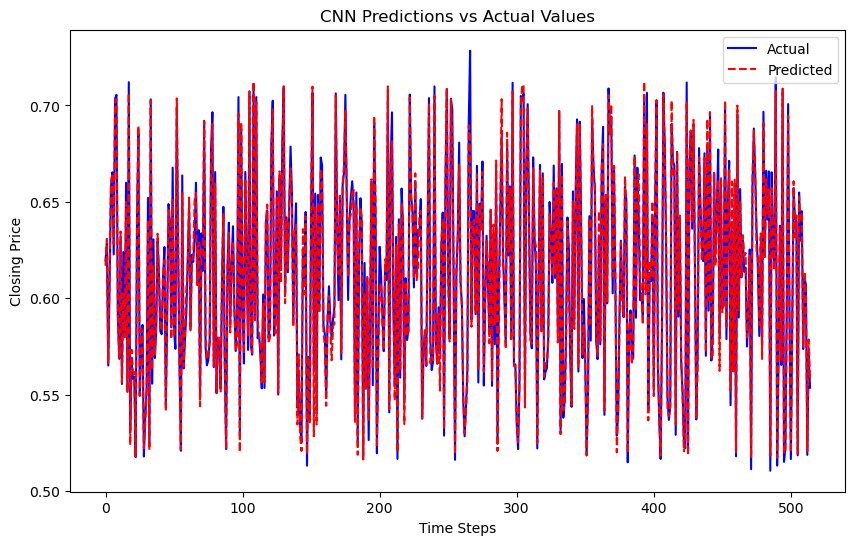

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled,y_pred_rescaled)
r2 = r2_score(y_test_rescaled,y_pred_rescaled)

cnn_metrics = {'MAE': mae * 100, 'R^2': r2,'MSE':mse*100,'MAPE':mape*100}

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## CNN_LSTM

d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0321 - mae: 0.1216 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0057 - val_mae: 0.0615
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - mae: 0.0328 - val_loss: 0.0051 - val_mae: 0.0571
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0085 - val_mae: 0.0788
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0103 - val_mae: 0.0879
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0117 - val_mae: 0.0942
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0075 - val_mae: 0.0752
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - mae: 0.0263 - val_loss: 0.0078 - val_mae: 0.0765
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.001

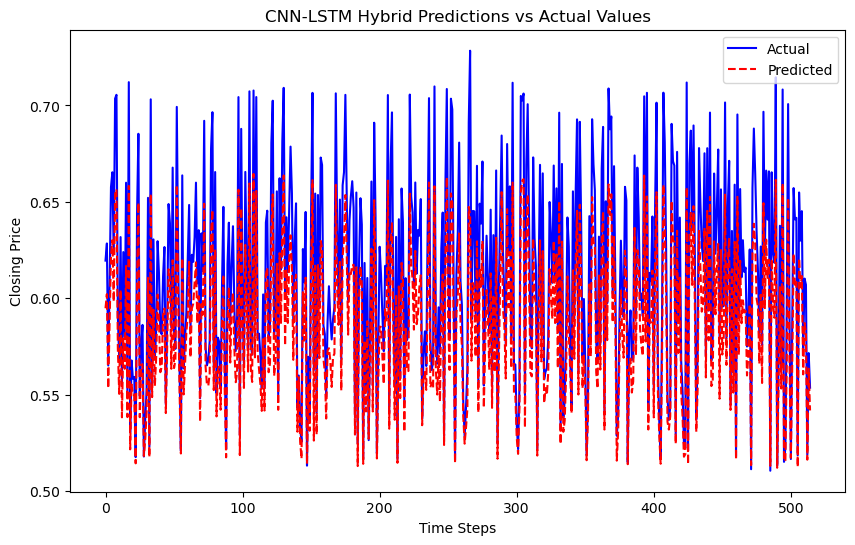

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    LSTM(64, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae =  mean_absolute_error(y_test_rescaled,y_pred_cnn_lstm_rescaled)
r2 = r2_score(y_test_rescaled,y_pred_cnn_lstm_rescaled)
mse =mean_squared_error(y_test_rescaled,y_pred_cnn_lstm_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled,y_pred_cnn_lstm_rescaled)

cnnlstm_metrics = {'MAE': mae * 100, 'R^2': r2,'MSE':mse*100,'MAPE':mape*100}


# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN-LSTM Hybrid Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## SARIMA

In [40]:
jpy_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000,0.000000,0.000000e+00,0.000000,0.525811,0.537685,0.513938
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000,0.000005,9.572650e-07,0.000004,0.525811,0.537685,0.513938
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000,-0.000396,-7.842673e-05,-0.000318,0.525811,0.537685,0.513938
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000,-0.000708,-2.043055e-04,-0.000504,0.525811,0.537685,0.513938
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000,-0.000901,-3.436465e-04,-0.000557,0.525811,0.537685,0.513938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372,-0.006265,-5.093533e-03,-0.001171,0.565557,0.585700,0.545415
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909,-0.006417,-5.358170e-03,-0.001059,0.563746,0.581709,0.545783
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433,-0.006766,-5.639814e-03,-0.001127,0.562004,0.578819,0.545188
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871,-0.006999,-5.911680e-03,-0.001087,0.560164,0.574476,0.545852


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assume jpy_inr is your DataFrame with the 'Date' column and target 'Closing_price'
# Ensure 'Date' is in datetime format
jpy_inr['Date'] = pd.to_datetime(jpy_inr['Date'])

# Convert 'Date' to numeric (timestamp)
jpy_inr['Date_numeric'] = jpy_inr['Date'].apply(lambda x: x.timestamp())

# Set the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(jpy_inr) * 0.8)
train, test = jpy_inr[:train_size], jpy_inr[train_size:]

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(3,1,2),  # AR, I, MA order
                       seasonal_order=(1, 1, 1, 6),  # Seasonal order
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

mse = mean_squared_error(test[target], predictions)
mae = mean_absolute_error(test[target], predictions)
r2 = r2_score(test[target],predictions)
mape = mean_absolute_percentage_error(test[target], predictions)
sarima_metrics = {'MAE': mae * 100, 'R^2': r2,'MSE':mse*100,'MAPE':mape * 100}


# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\559410747.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_18180\559410747.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ValueError: Input contains NaN.

d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



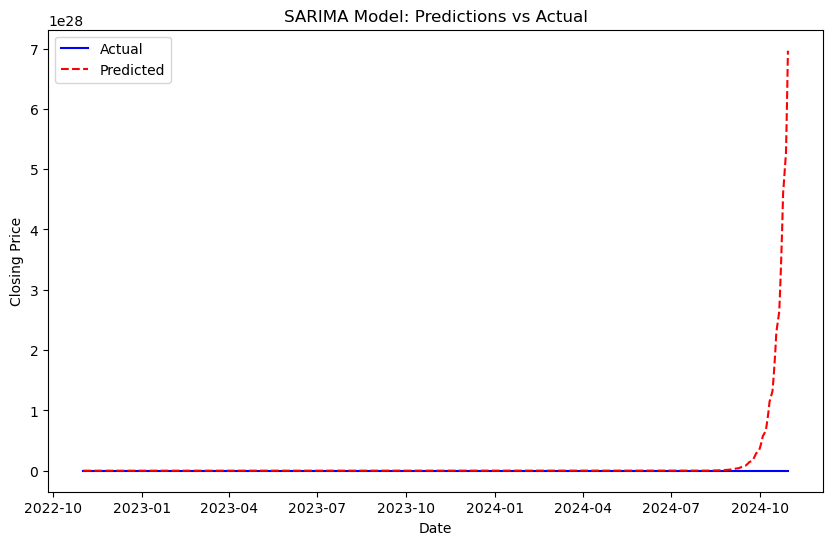

Root Mean Squared Error (RMSE): 6196548627096985789368631296.0000


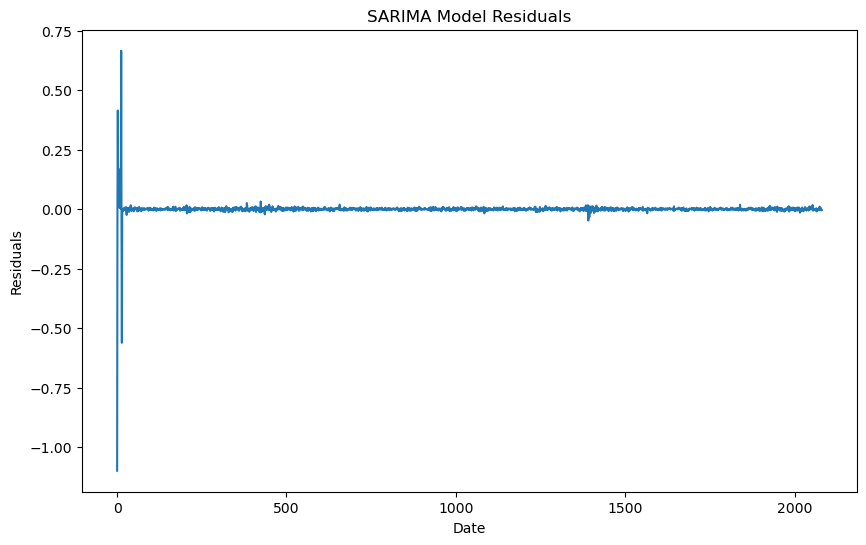

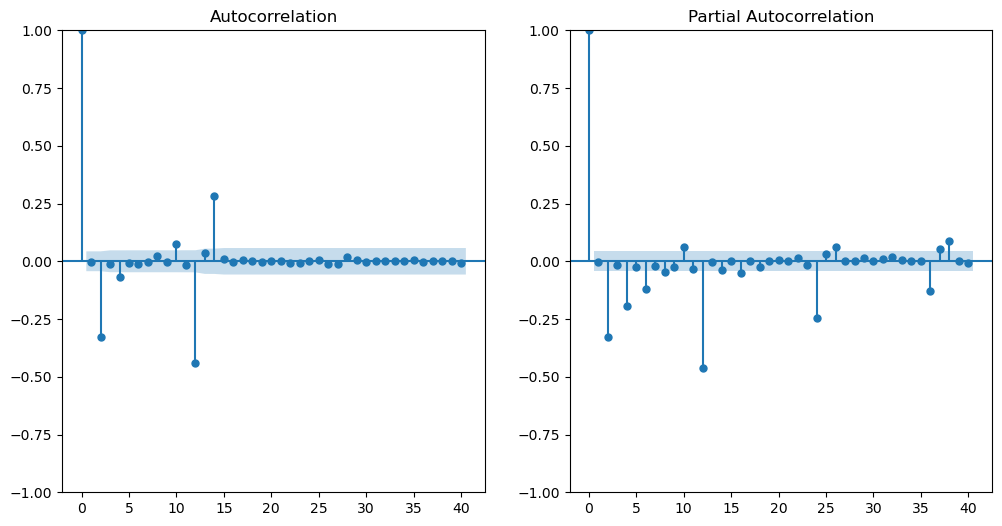

                                      SARIMAX Results                                       
Dep. Variable:                        Closing_price   No. Observations:                 2081
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                7894.453
Date:                              Fri, 29 Nov 2024   AIC                         -15770.906
Time:                                      18:44:46   BIC                         -15720.262
Sample:                                           0   HQIC                        -15752.335
                                             - 2081                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric  1.155e-09   2.06e-09      0.560      0.575   -2.88e-09     5.2e-09
ar.L1        

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Ensure 'Date' is in datetime format
jpy_inr['Date'] = pd.to_datetime(jpy_inr['Date'])

# Convert 'Date' to numeric (timestamp)
jpy_inr['Date_numeric'] = jpy_inr['Date'].apply(lambda x: x.timestamp())

# Define the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(jpy_inr) * 0.8)
train, test = jpy_inr[:train_size], jpy_inr[train_size:]

# Hyperparameters for SARIMA
p, d, q = 3, 1, 2  # AR, I, MA order
P, D, Q, S = 1, 1, 1, 12  # Seasonal AR, I, MA order, and period

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, S), 
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Evaluate the model with RMSE
rmse_val = rmse(test[target], predictions)
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")

# Plot residuals to check for patterns
residuals = sarima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


## FBProphet

In [43]:
pip install prophet


In [44]:
# Calculate MAE, MSE, RMSE, and MAPE for the train and test sets
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    r2 =r2_score(actual, predicted)
    accuracy = 100 - mape  # Accuracy-like score as (100% - MAPE)
    
    return mae, mse, rmse, mape, accuracy , r2 

In [ ]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = jpy_inr  # Replace this with your data
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)
df.dropna(inplace=True)

# Add the 'cap' column for logistic growth (set it to the max of 'y')
df['cap'] = df['y'].max()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Set up the hyperparameters grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1, 10, 20],
    'holidays_prior_scale': [10, 15, 20],
    'changepoint_range': [0.8, 0.9],
    'growth': ['linear', 'logistic']  # Will test both linear and logistic growth
}

# Initialize variables to store the best model and best score
best_model = None
best_score = float('inf')
best_params = {}

# Grid Search Loop
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        for holidays_prior_scale in param_grid['holidays_prior_scale']:
            for changepoint_range in param_grid['changepoint_range']:
                for growth in param_grid['growth']:
                    # Initialize Prophet with the current set of hyperparameters
                    prophet_model = Prophet(
                        changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale,
                        holidays_prior_scale=holidays_prior_scale,
                        changepoint_range=changepoint_range,
                        growth=growth
                    )
                    
                    # If logistic growth, add the 'cap' column
                    if growth == 'logistic':
                        prophet_model.fit(train[['ds', 'y', 'cap','Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band']])
                    else:
                        prophet_model.fit(train[['ds', 'y','Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band']])
                    
                    # Create future dataframe for predictions
                    future = prophet_model.make_future_dataframe(periods=len(test))
                    
                    # Add the 'cap' column for logistic growth
                    if growth == 'logistic':
                        future['cap'] = df['cap'].iloc[0]  # Same constant value as for training
                    
                    forecast = prophet_model.predict(future)
                    
                    # Evaluate model performance on the test set
                    test_yhat = forecast['yhat'][-len(test):].values
                    #mae, mse, rmse, mape, accuracy = evaluate_model(test['y'].values, test_yhat)
                    
                    # If the model has better performance, store it
                    if mse < best_score:
                        best_score = mse
                        best_model = prophet_model
                        best_params = {
                            'changepoint_prior_scale': changepoint_prior_scale,
                            'seasonality_prior_scale': seasonality_prior_scale,
                            'holidays_prior_scale': holidays_prior_scale,
                            'changepoint_range': changepoint_range,
                            'growth': growth
                        }

# Output the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_score)

# Evaluate the best model on the test set
best_forecast = best_model.predict(best_model.make_future_dataframe(periods=len(test)))
test_yhat = best_forecast['yhat'][-len(test):].values
#mae, mse, rmse, mape, accuracy = evaluate_model(test['y'].values, test_yhat)

mae = mean_absolute_error(test['y'].values, test_yhat)
mse =  mean_absolute_error(test['y'].values, test_yhat)
r2 = r2_score(test['y'].values, test_yhat)
mape = mean_absolute_percentage_error(test['y'].values, test_yhat)
prophet_metrics = {'MAE': mae * 100, 'R^2': r2,'MSE':mse*100,'MAPE':mape*100}


print("Test Metrics for Best Model:")
#print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, Accuracy: {accuracy:.2f}%")


18:45:01 - cmdstanpy - INFO - Chain [1] start processing
18:45:03 - cmdstanpy - INFO - Chain [1] done processing
18:45:04 - cmdstanpy - INFO - Chain [1] start processing
18:45:05 - cmdstanpy - INFO - Chain [1] done processing
18:55:15 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing
18:55:33 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:35 - cmdstanpy - INFO - Chain [1] start processing
18:55:36 - cmdstanpy - INFO - Chain [1] done processing
18:55:51 - cmdstanpy - INFO - Chain [1] start processing
18:55:51 - cmdstanpy - INFO - Chain [1] done processing
18:55:53 - cmdstanpy - INFO - Chain [1] start processing
18:55:53 - cmdstanpy - INFO - Chain [1] done processing
18:56:08 - cmdstanpy - INFO - Chain [1] start processing
18:56:09 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'changepoint_range': 0.8, 'growth': 'linear'}
Best MSE: 2.527686913834119e+71
Test Metrics for Best Model:


In [46]:
best_model.params

OrderedDict([('lp__', array([[6568.32]])),
             ('k', array([[0.0823095]])),
             ('m', array([[0.71947]])),
             ('delta',
              array([[-1.24241e-08,  4.82441e-02,  9.51694e-01,  3.23119e-01,
                      -2.48940e-09, -6.28253e-01, -1.60812e+00,  6.75269e-09,
                       9.91717e-04,  5.94685e-01,  7.12052e-01,  1.11632e-01,
                       3.94992e-08, -9.91343e-07, -2.95335e-01, -1.50438e-07,
                       4.07248e-08,  1.01425e-01,  1.50533e-01,  1.47697e-04,
                      -4.09182e-08, -2.10521e-01, -1.32651e-01, -6.23360e-01,
                      -4.56862e-01]])),
             ('sigma_obs', array([[0.0184765]])),
             ('beta',
              array([[-4.70938e-03, -3.16229e-03,  3.78382e-03, -3.96000e-03,
                       1.39769e-03,  4.81698e-04, -2.41267e-05, -2.40413e-03,
                       9.98766e-04, -4.46574e-04, -1.29629e-03,  1.04636e-03,
                       1.89225e-03, -3

In [47]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
# Ensure your dataset has columns like 'Date', 'Closing_price', 'RSI', 'MACD', etc.
df = jpy_inr  # Replace `jpy_inr` with your actual dataframe variable
print("Columns in dataset:", df.columns)

# Rename columns as Prophet requires 'ds' (date) and 'y' (target)
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Specify the additional regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band', 'Lower Band'
]

# Ensure all specified regressors are present in the dataset
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Initialize the Prophet model with tuned hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    changepoint_range=best_params['changepoint_range'],
    growth=best_params['growth']
)

# Set the random state for reproducibility
prophet_model.random_state = 42

# Add each regressor to the Prophet model
for regressor in regressors:
    prophet_model.add_regressor(regressor)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]


# Train the model
#best_model.fit(train[['ds', 'y'] + regressors ])

# Create a future dataframe for predictions
future = best_model.make_future_dataframe(periods=len(test)+200)
for regressor in regressors:
    future[regressor] = df[regressor]



# Make predictions
forecast = best_model.predict(future)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, accuracy , r2

# Evaluate on train and test sets
train_forecast = best_model.predict(train[['ds'] + regressors ])
train_yhat = train_forecast['yhat'].values
train_metrics = evaluate_model(train['y'].values, train_yhat)

test_forecast = best_model.predict(test[['ds'] + regressors ])
test_yhat = test_forecast['yhat'].values
test_metrics = evaluate_model(test['y'].values, test_yhat)

# Print metrics
print("Train Metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, MAPE: {train_metrics[3]:.2f}%, Accuracy: {train_metrics[4]:.2f}%")
print("\nTest Metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, MAPE: {test_metrics[3]:.2f}%, Accuracy: {test_metrics[4]:.2f}%")

# Plot predictions vs actual values
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Plot predicted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted', line=dict(color='red')))

# Plot upper and lower bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound',
    line=dict(color='lightgrey', dash='dot')
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound',
    line=dict(color='lightgrey', dash='dot')
))

# Update layout
fig.update_layout(
    title="Prophet with Regressors: Predictions vs Actual",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


Columns in dataset: Index(['ds', 'Open_price', 'Day_high', 'Day_low', 'y', 'Currency Pair',
       'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band', 'Date_numeric', 'cap'],
      dtype='object')
Train Metrics:
MAE: 0.0108, MSE: 0.0002, RMSE: 0.0135, MAPE: 1.74%, Accuracy: 98.26%

Test Metrics:
MAE: 0.0866, MSE: 0.0085, RMSE: 0.0921, MAPE: 15.15%, Accuracy: 84.85%
